<a href="https://colab.research.google.com/github/Mumo-vicky/Week-9-Projects./blob/main/Titanic_Survival_Prediction_(kNN_Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

## **Defining The Question**

Create a kNN Classifier model that is capable of classifying survivors and non-survivors in the titanic datset.

## **Defining Metric For Success**

The aim is to achieve an accurate model for the prediction of survivors and non-survivors.

My model should be able to attain an accuracy of 80% or more

## **Understanding The Context**

The titanic dataset has been in usefor a long time. It contains information on the individuals on the titanic at the time of its demise. We should be able to determine influential factors that contributed to one either surviving or not and have a model that could predict whether one would survive based on the factors provided.

## **Experimental Design**

I am going to go through the following steps in my project.
* Importing libraries and loading the data
* Checking and cleaning the data.
* Performing Exploratory Data Analysis
* Data pre-processing
* Building the kNN classification model 
* Evaluating the model
* Conclusion.
* Follow up Questions

## **Data Relevance**

We are using the train dataset for our model creation. It is relevant for our research question.

# **Data Preparation**

## **Loading The Libraries**

In [1]:
#loading the needed libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## **Exploring The Dataset**

In [2]:
#loading te dataset
titanic = pd.read_csv('https://archive.org/download/train5_202002/train%20%285%29.csv')

In [3]:
#checking the first five rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking the last five rows of the dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
#checking for the rows and columns
titanic.shape

(891, 12)

We have 891 rows and 12 columns.

In [7]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The following are the columns;
* PassengerId
* Survived - Survival (0=No, 1=Yes)
* Pclass - The class for the ticket.(1, 2, 3)
* Name - Name of passenger
* Sex - Sex of passenger
* Age - Age of passenger
* SibSp - Number of siblings or spouses onboard
* Parch - Number of parents or children onboard.
* Ticket - Ticket number
* Fare - Fare
* Cabin - Cabin number
* Embarked - Point of Embarkment(C = Cherbourg, Q = Queenstown, S = Southampton)

In [8]:
#checking for dataset information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#checking for null values.
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that age, cabin and embarked have null values.

For the age and cabin columns, we are going to explore them and determine what to do but since the embarked column has only two, we are going to drop them.

In [10]:
#checking for duplicated values
titanic.duplicated().sum()

0

We do not have any duplicated values in our dataset

In [11]:
#checking the number of unique values in the columns
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

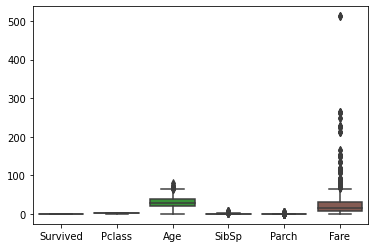

In [12]:
#plotting outliers in the numerical variables.
colmns = titanic[['Survived','Pclass','Age','SibSp','Parch','Fare']]
plt.figure
ax = sns.boxplot(data = colmns)
plt.show()

## **Tidying The Dataset.**

We will start by first removing the embarked null values.

In [13]:
#dropping null values in the Embarked column.
titanic = titanic.dropna(subset=['Embarked'])

We will now explore the age column in order for us to fill in the missing values appropriately.

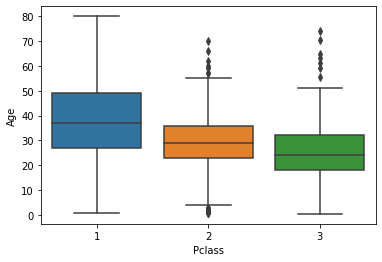

In [14]:
#plotting a boxplot for ages and the Pclass.
sns.boxplot(x='Pclass', y='Age', data=titanic)

From our plot, we can sea that people with a higher age tend to be in the first class, compared to the youger group in the second and third class.

The mean ages for the three groups is as follows:

38 - First Class

29 - Second Class

23 - Third Class

We are thus going to create a function for replacement of the null values in the age column.

In [15]:
#creating a function for returning means of ages in different Pclasses.
def null_age_repl(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 23
    else:
        return Age
#using the function for the replacement of the null values.
titanic['Age'] = titanic[['Age', 'Pclass']].apply(null_age_repl, axis=1)

In [16]:
#checking for null values.
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

We can see that the ages have been updated. We will drop the cabin column along with other columns since we will not use them in our classification, thus there is no need to deal with the null values.

In [17]:
#dropping the colmns that we do not need.
titanic = titanic.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [18]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,23.0,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [19]:
#changing the stated columns to string datatype.
titanic["Sex"] = titanic["Sex"].astype('str')
titanic["Embarked"] = titanic["Embarked"].astype('str')

#creating the encoder.
le = LabelEncoder()

#encoding the values in the columns.
titanic['Sex'] = le.fit_transform(titanic['Sex'])
titanic['Embarked'] = le.fit_transform(titanic['Embarked'])

In [20]:
titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,23.0,0,0,8.4583,1
6,0,1,1,54.0,0,0,51.8625,2
7,0,3,1,2.0,3,1,21.0750,2
8,1,3,0,27.0,0,2,11.1333,2
9,1,2,0,14.0,1,0,30.0708,0


# **Exploratory Data Analysis**

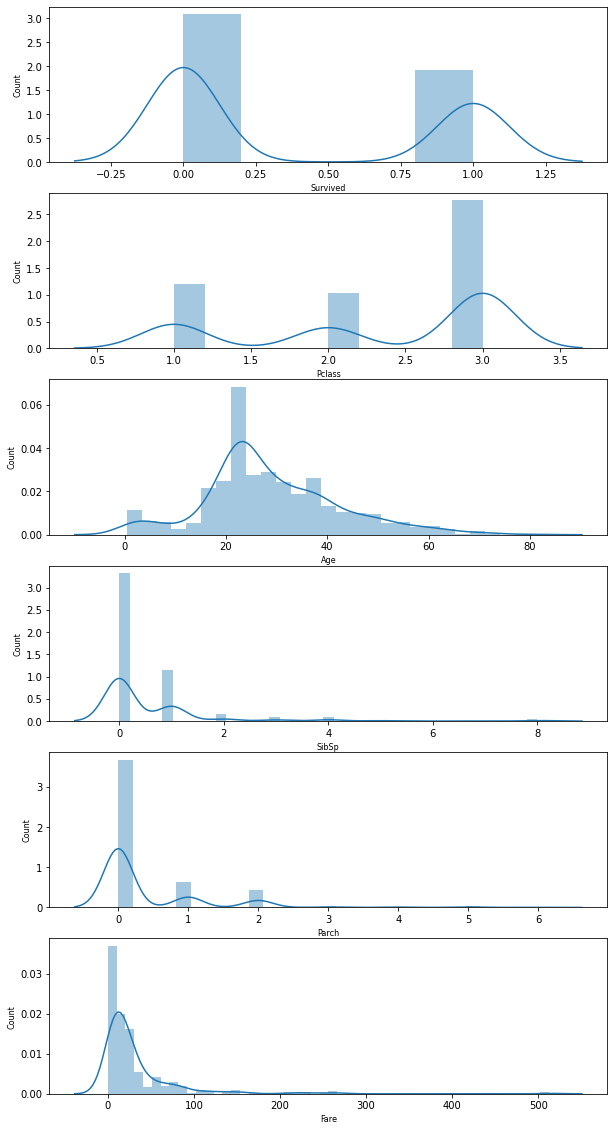

In [21]:
#declaring the columns and creating a loop for the histogram plots.
colmn = ['Survived','Pclass','Age','SibSp','Parch','Fare']
fig, ax = plt.subplots(len(colmn), figsize=(10,20))

for i, col_val in enumerate(colmn):

    sns.distplot(titanic[col_val], hist=True, ax=ax[i])
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

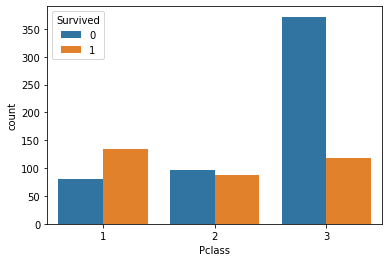

In [22]:
#viewing the state of survivors in the passenger classes.
sns.countplot('Pclass', hue = 'Survived', data = titanic)

* Majority of people in the 3rd class did not survive.

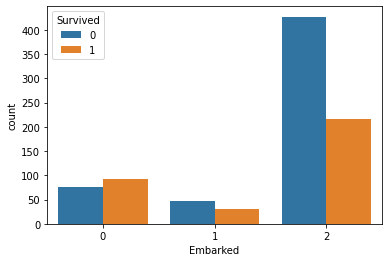

In [25]:
#viewing the state of survivors according to where they embarked from
sns.countplot('Embarked', hue = 'Survived', data = titanic)

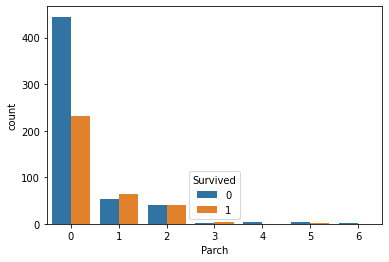

In [26]:
#viewing the state of survivors according to the number of children or parent onboard
sns.countplot('Parch', hue = 'Survived', data = titanic)

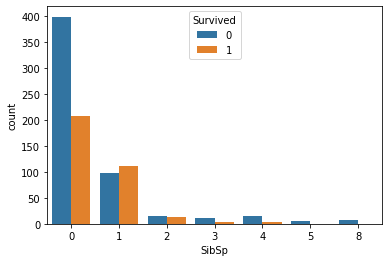

In [ ]:
#viewing the state of survivors according to the number of siblings or spouses onboard.
sns.countplot('SibSp', hue = 'Survived', data = titanic)

In [ ]:
#creating the correlation matrix.
correlation = titanic.corr()
correlation

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.335549,-0.541585,-0.048141,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.335549,1.000000,0.127741,-0.416454,0.081656,0.016824,-0.548193,0.164681
Sex,-0.541585,0.127741,1.000000,0.082450,-0.116348,-0.247508,-0.179958,0.110320
Age,-0.048141,-0.416454,0.082450,1.000000,-0.243747,-0.167897,0.125621,-0.010438
SibSp,-0.034040,0.081656,-0.116348,-0.243747,1.000000,0.414542,0.160887,0.068900
Parch,0.083151,0.016824,-0.247508,-0.167897,0.414542,1.000000,0.217532,0.040449
Fare,0.255290,-0.548193,-0.179958,0.125621,0.160887,0.217532,1.000000,-0.226311
Embarked,-0.169718,0.164681,0.110320,-0.010438,0.068900,0.040449,-0.226311,1.000000


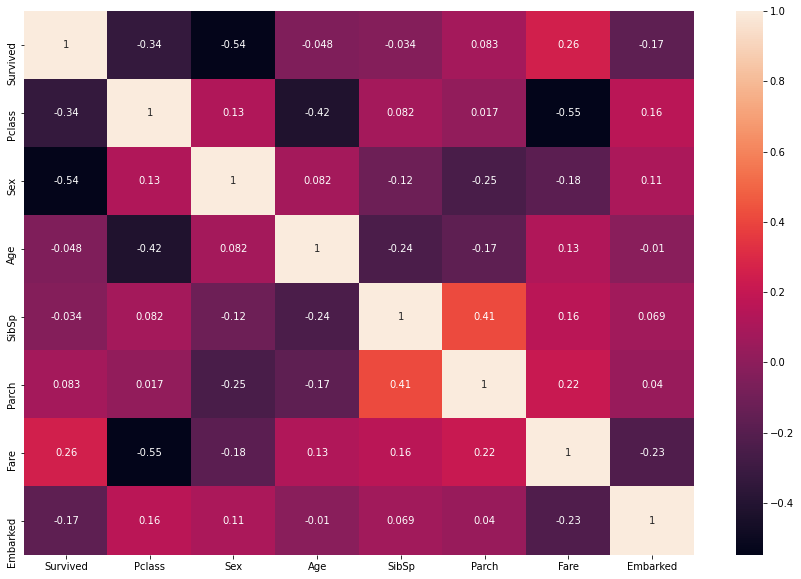

In [ ]:
plt.figure(figsize=(15, 10))  
sns.heatmap(correlation, annot = True)

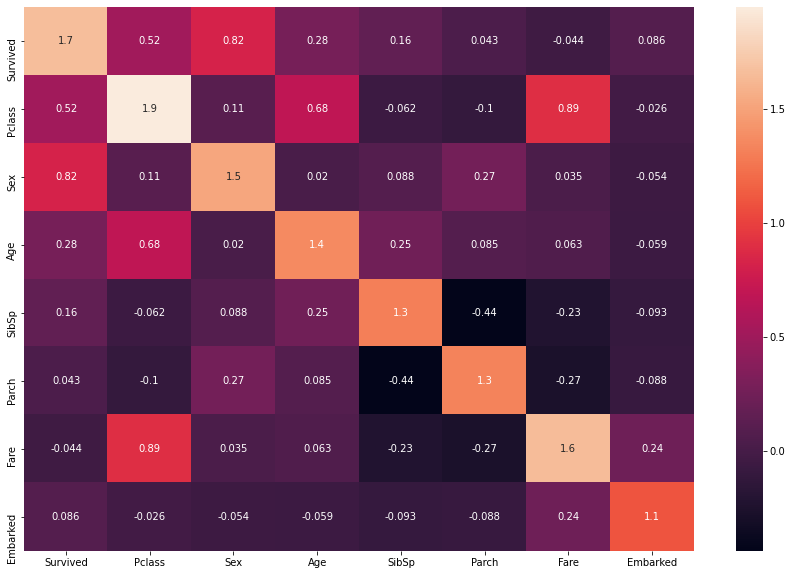

In [ ]:
#creating the vif chart.
vif = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns = correlation.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sns.heatmap(vif, annot = True)

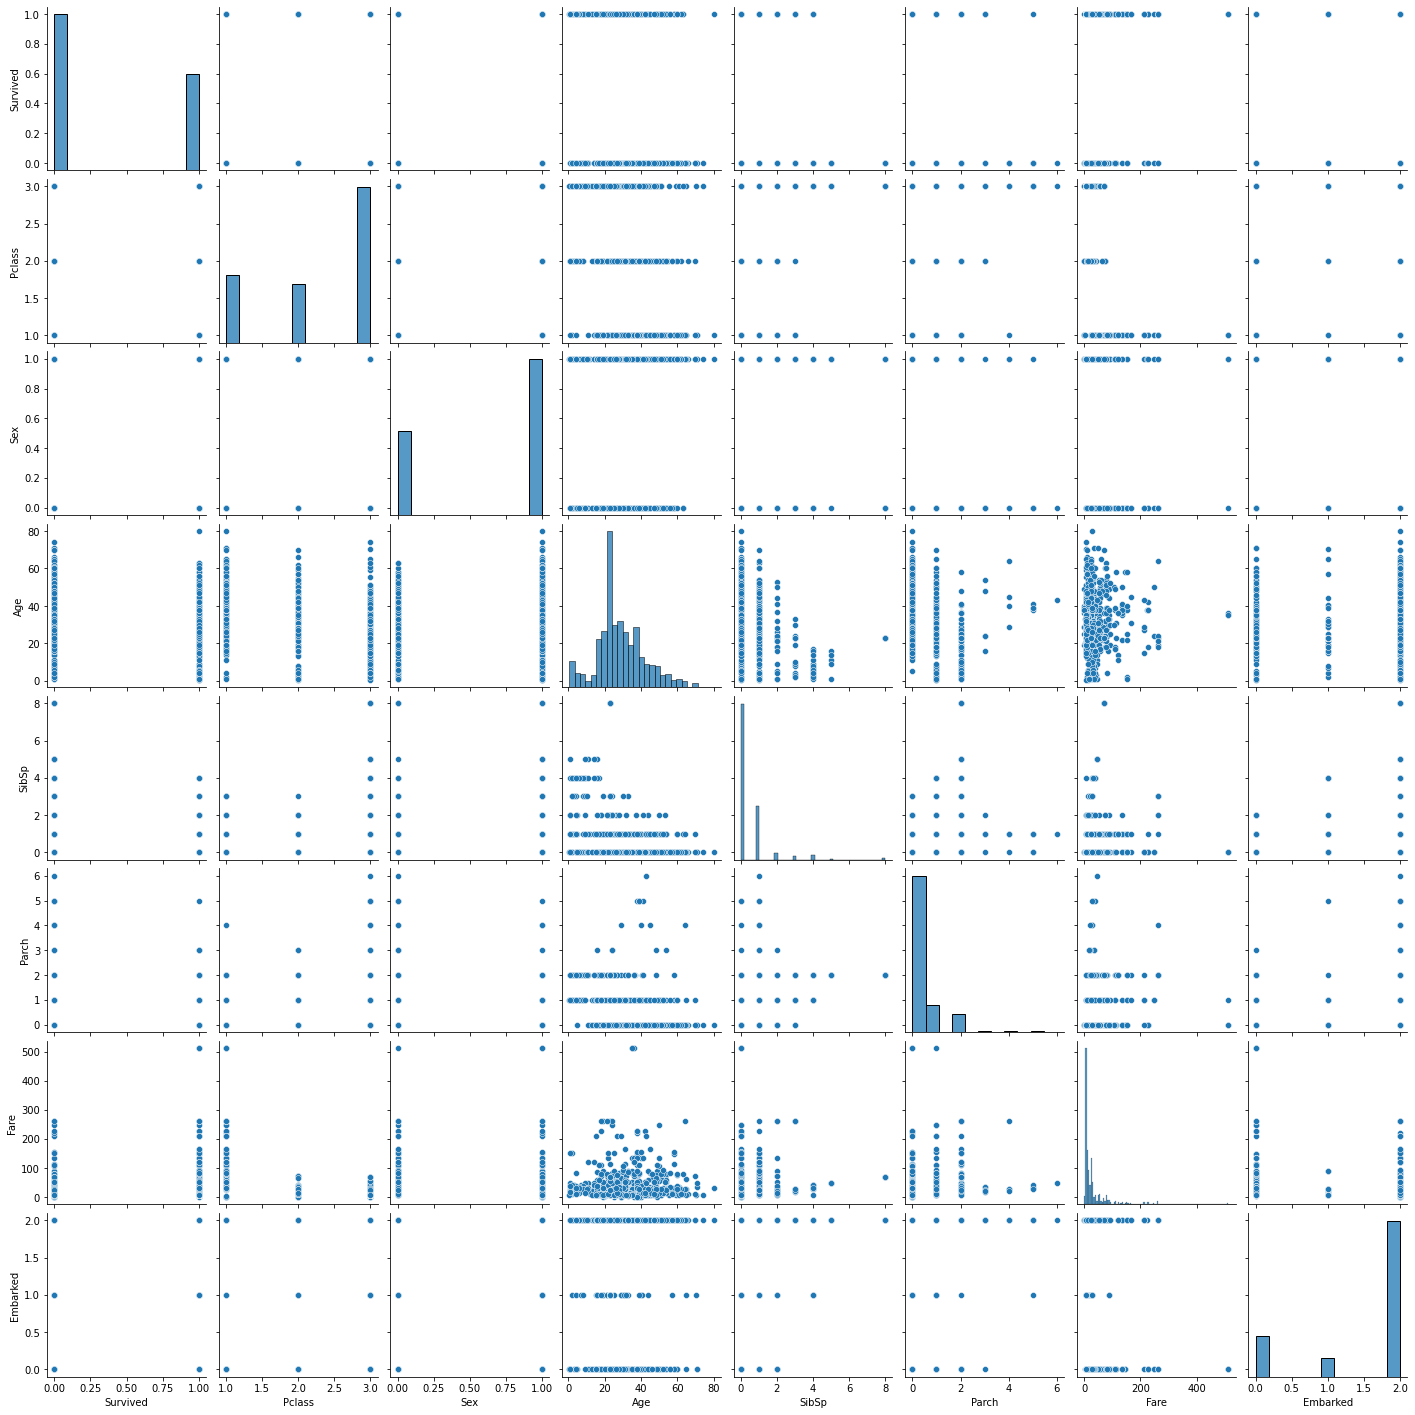

In [ ]:
sns.pairplot(titanic)
plt.show()

# **kNN Modelling**

## **Baseline Model**

In [27]:
#describing the independent and dependent variables
y = titanic['Survived'].values

test_features = titanic.columns.to_list()
test_features.remove('Survived')

x = titanic[test_features].values

#splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
#creating the model and fitting it.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

#predicting using the model.
y_pred = knn.predict(x_test)

#printing out the metrics for the perfomance of the model.
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[81 24]
 [28 45]]
              precision    recall  f1-score   support

           0       0.74      0.77      0.76       105
           1       0.65      0.62      0.63        73

    accuracy                           0.71       178
   macro avg       0.70      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



In [29]:
accuracy_score(y_test, y_pred)

0.7078651685393258

We have an accuracy score of 70.078%. This is not great. We will go on to perform several techniques for the betterment of the model.

## **Improving The Model**

In [37]:
#describing the independent and dependent variables
y1 = titanic['Survived'].values

test_features = titanic.columns.to_list()
test_features.remove('Survived')

x1 = titanic[test_features].values

#splitting the dataset.
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=0)

**Feature Selection**

In [38]:
#selecting 5 best features for use.
titanic_new = SelectKBest(chi2, k=5).fit_transform(x1, y1)
titanic_new.shape

(889, 5)

In [39]:
print(titanic_new)
titanic.head()

[[ 3.      1.     22.      7.25    2.    ]
 [ 1.      0.     38.     71.2833  0.    ]
 [ 3.      0.     26.      7.925   2.    ]
 ...
 [ 3.      0.     23.     23.45    2.    ]
 [ 1.      1.     26.     30.      0.    ]
 [ 3.      1.     32.      7.75    1.    ]]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


We can see that our best five features are Pclass, Sex, Age, Fare, and embarked. We will choose these five and see how the perfomance goes.

In [40]:
#describing the independent and dependent variables
y2 = titanic['Survived'].values

new_test_features1 = titanic.columns.to_list()
new_test_features1.remove('Survived')
new_test_features1.remove('Parch')
new_test_features1.remove('SibSp')

x2 = titanic[new_test_features1].values

#splitting the dataset
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=0)

In [41]:
#creating the model and fitting it.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x2_train, y2_train)

#predicting using the model
y2_pred = knn.predict(x2_test)

#finding the metrics for the perfomance of the model
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))

[[80 25]
 [33 40]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       105
           1       0.62      0.55      0.58        73

    accuracy                           0.67       178
   macro avg       0.66      0.65      0.66       178
weighted avg       0.67      0.67      0.67       178



In [42]:
accuracy_score(y2_test, y2_pred)

0.6741573033707865

We have attained a score of 67.41% which is a drop.

We are going to repeat the process choosing different feature sizes to see the perfomance.

In [43]:
#choosing 4 features
titanic_new1 = SelectKBest(chi2, k=4).fit_transform(x1, y1)
titanic_new1.shape

(889, 4)

In [44]:
print(titanic_new1)
titanic.head()

[[ 3.      1.     22.      7.25  ]
 [ 1.      0.     38.     71.2833]
 [ 3.      0.     26.      7.925 ]
 ...
 [ 3.      0.     23.     23.45  ]
 [ 1.      1.     26.     30.    ]
 [ 3.      1.     32.      7.75  ]]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [45]:
#describing the independent and dependent variables.
y3 = titanic['Survived'].values

new_test_features2 = titanic.columns.to_list()
new_test_features2.remove('Survived')
new_test_features2.remove('Parch')
new_test_features2.remove('SibSp')
new_test_features2.remove('Embarked')

x3 = titanic[new_test_features2].values

#splitting the dataset.
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=0)

In [46]:
#creating the model and fitting it.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x3_train, y3_train)

#predicting using the model
y3_pred = knn.predict(x3_test)

#preinting out the metrics for perfomance.
print(confusion_matrix(y3_test, y3_pred))
print(classification_report(y3_test, y3_pred))

[[81 24]
 [32 41]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       105
           1       0.63      0.56      0.59        73

    accuracy                           0.69       178
   macro avg       0.67      0.67      0.67       178
weighted avg       0.68      0.69      0.68       178



In [47]:
accuracy_score(y3_test, y3_pred)

0.6853932584269663

The accuracy has improved to 68.54%

In [48]:
#choosing 3 best features
titanic_new2 = SelectKBest(chi2, k=3).fit_transform(x1, y1)
titanic_new2.shape

(889, 3)

In [49]:
print(titanic_new2)
titanic.head()

[[ 3.      1.      7.25  ]
 [ 1.      0.     71.2833]
 [ 3.      0.      7.925 ]
 ...
 [ 3.      0.     23.45  ]
 [ 1.      1.     30.    ]
 [ 3.      1.      7.75  ]]


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [50]:
#describing the independent and dependent variables.
y4 = titanic['Survived'].values

new_test_features3 = titanic.columns.to_list()
new_test_features3.remove('Survived')
new_test_features3.remove('Parch')
new_test_features3.remove('SibSp')
new_test_features3.remove('Embarked')
new_test_features3.remove('Age')

x4 = titanic[new_test_features3].values

#splitting the dataset
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=0)

In [51]:
#creating the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x4_train, y4_train)

#predicting using the model
y4_pred = knn.predict(x4_test)

#printing out the metrics for perfomance
print(confusion_matrix(y4_test, y4_pred))
print(classification_report(y4_test, y4_pred))

[[82 23]
 [24 49]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       105
           1       0.68      0.67      0.68        73

    accuracy                           0.74       178
   macro avg       0.73      0.73      0.73       178
weighted avg       0.74      0.74      0.74       178



In [52]:
accuracy_score(y4_test, y4_pred)

0.7359550561797753

**Scaling**

In [57]:
#defining the scaler and fitting it
std_scl = StandardScaler()
std_scl.fit(x4_train)

#transforming the variables
x5_train = std_scl.transform(x4_train)
x5_test = std_scl.transform(x4_test)

In [58]:
#creating the model and fitting it.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x5_train, y4_train)

#predicting using the model
y5_pred = knn.predict(x5_test)

#printing out the metrics for model perfomance.
print(confusion_matrix(y4_test, y5_pred))
print(classification_report(y4_test, y5_pred))

[[86 19]
 [26 47]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       105
           1       0.71      0.64      0.68        73

    accuracy                           0.75       178
   macro avg       0.74      0.73      0.73       178
weighted avg       0.74      0.75      0.74       178



In [59]:
accuracy_score(y4_test, y5_pred)

0.7471910112359551

**Linear Discriminant Analysis (LDA)**

In [56]:
#defining the lda, fitting and transforming the variables.
lda = LDA(n_components=1)
x6_train = lda.fit_transform(x4_train, y4_train)
x6_test = lda.transform(x4_test)

In [60]:
#creating the model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x6_train, y4_train)

#predicting using the model
y6_pred = knn.predict(x6_test)

#printing out the metrics for perfomance
print(confusion_matrix(y4_test, y6_pred))
print(classification_report(y4_test, y6_pred))

[[87 18]
 [30 43]]
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       105
           1       0.70      0.59      0.64        73

    accuracy                           0.73       178
   macro avg       0.72      0.71      0.71       178
weighted avg       0.73      0.73      0.73       178



In [61]:
accuracy_score(y4_test, y6_pred)

0.7303370786516854

**70-30 Split**

In [62]:
#describing the independent and dependent variables.
y7 = titanic['Survived'].values

new_test_features = titanic.columns.to_list()
new_test_features.remove('Survived')
new_test_features.remove('Parch')
new_test_features.remove('SibSp')
new_test_features.remove('Embarked')
new_test_features.remove('Age')

x7 = titanic[new_test_features].values

#splitting the dataset
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=0.3, random_state=0)

In [63]:
#scaling
std_scl = StandardScaler()
std_scl.fit(x7_train)

x7_train = std_scl.transform(x7_train)
x7_test = std_scl.transform(x7_test)

In [64]:
#lda analysis
lda = LDA(n_components=1)
x7_train = lda.fit_transform(x7_train, y7_train)
x7_test = lda.transform(x7_test)

In [65]:
#model creation, fitting and metrics analaysis
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x7_train, y7_train)

y7_pred = knn.predict(x7_test)

print(confusion_matrix(y7_test, y7_pred))
print(classification_report(y7_test, y7_pred))

[[129  28]
 [ 33  77]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.73      0.70      0.72       110

    accuracy                           0.77       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.77      0.77       267



In [ ]:
accuracy_score(y7_test, y7_pred)

0.7715355805243446

**60-40 Split**

In [66]:
#describing the independent and dependent variables.
y8 = titanic['Survived'].values

new_test_features = titanic.columns.to_list()
new_test_features.remove('Survived')
new_test_features.remove('Parch')
new_test_features.remove('SibSp')
new_test_features.remove('Embarked')
new_test_features.remove('Age')

x8 = titanic[new_test_features].values

#splitting the dataset
x8_train, x8_test, y8_train, y8_test = train_test_split(x8, y8, test_size=0.4, random_state=0)

In [67]:
#scaling
std_scl = StandardScaler()
std_scl.fit(x8_train)

x8_train = std_scl.transform(x8_train)
x8_test = std_scl.transform(x8_test)

In [68]:
#lda analysis
lda = LDA(n_components=1)
x8_train = lda.fit_transform(x8_train, y8_train)
x8_test = lda.transform(x8_test)

In [69]:
#model creation, fitting, prediction and metrics analysis.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x8_train, y8_train)

y8_pred = knn.predict(x8_test)

print(confusion_matrix(y8_test, y8_pred))
print(classification_report(y8_test, y8_pred))

[[188  28]
 [ 43  97]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       216
           1       0.78      0.69      0.73       140

    accuracy                           0.80       356
   macro avg       0.79      0.78      0.79       356
weighted avg       0.80      0.80      0.80       356



In [70]:
accuracy_score(y8_test, y8_pred)

0.800561797752809

# **Conclusion**

We have attained the following accuracy scores for the models we have created.

* Baseline Model - 0.7078651685393258
* 5-Features Model - 0.6741573033707865
* 4-Features Model - 0.6853932584269663
* 3-Features Model - 0.7359550561797753
* Scaled Model - 0.7471910112359551
* LDA Model - 0.7303370786516854


* 70-20 Split Model - 0.7715355805243446
* 60-40 Split Model - 0.800561797752809

We can see a gradual improvement as we were deploying the various techniques. In the end, our 60-40 split perfomed best as it had all the techniques tried on it, (3-best features, scaling and LDA analysis). This would be the model to go for as it is the most optimized and the one with the highest accuracy score.

Apart from that, its recall and precision scores are also good

# **Follow up questions**

## **Did we have the right data?**

Yes. The data is great for our model.

## **Do we need other data to answer our question?**

We don't need aadditional data. The data we have is enough for our analysis and our project.

## **Did we have the right question?**

Yes, the question was relevant to our project.